# 生成已标记的数据集

In [1]:
from sklearn.datasets.samples_generator import make_blobs
# 生成数据
centers = [[-2,2], [2,2], [0,4]]
X, y = make_blobs(n_samples=60, centers=centers,
                 random_state=0, cluster_std=0.60)



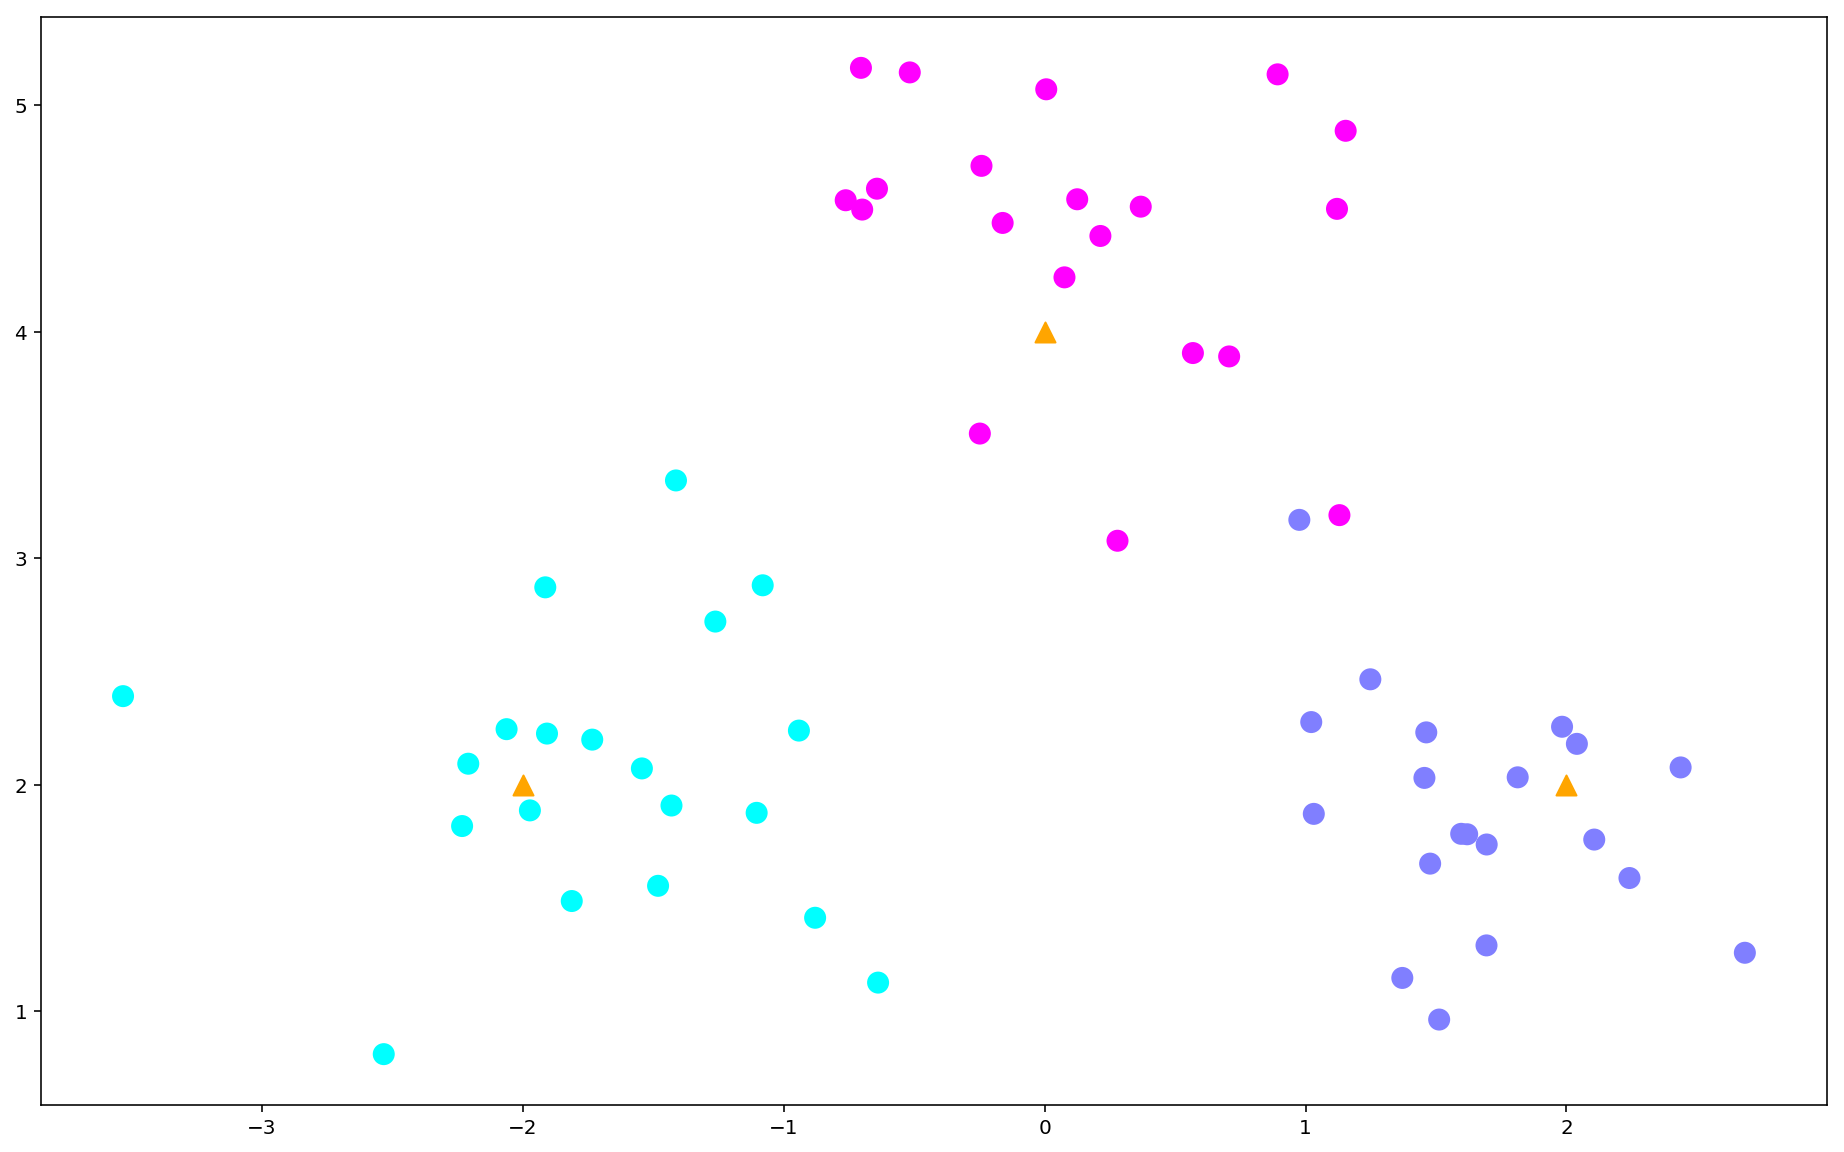

In [5]:
# 画出数据
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(16,10), dpi=144)
c = np.array(centers)
# 画出样本
plt.scatter(X[:,0], X[:,1], c=y, s=100, cmap='cool')
# 画出中心点
plt.scatter(c[:,0], c[:,1], s=100, marker='^',c='orange')
plt.savefig('knn_centers.png')
plt.show()


In [6]:
from sklearn.neighbors import KNeighborsClassifier
# 模型训练
k = 5
clf = KNeighborsClassifier(n_neighbors = k)
clf.fit(X, y)

"""
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
"""

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [10]:
# 进行预测
X_sample = np.array([[0, 2]])
y_sample = clf.predict(X_sample)
neighbors = clf.kneighbors(X_sample, return_distance=False)

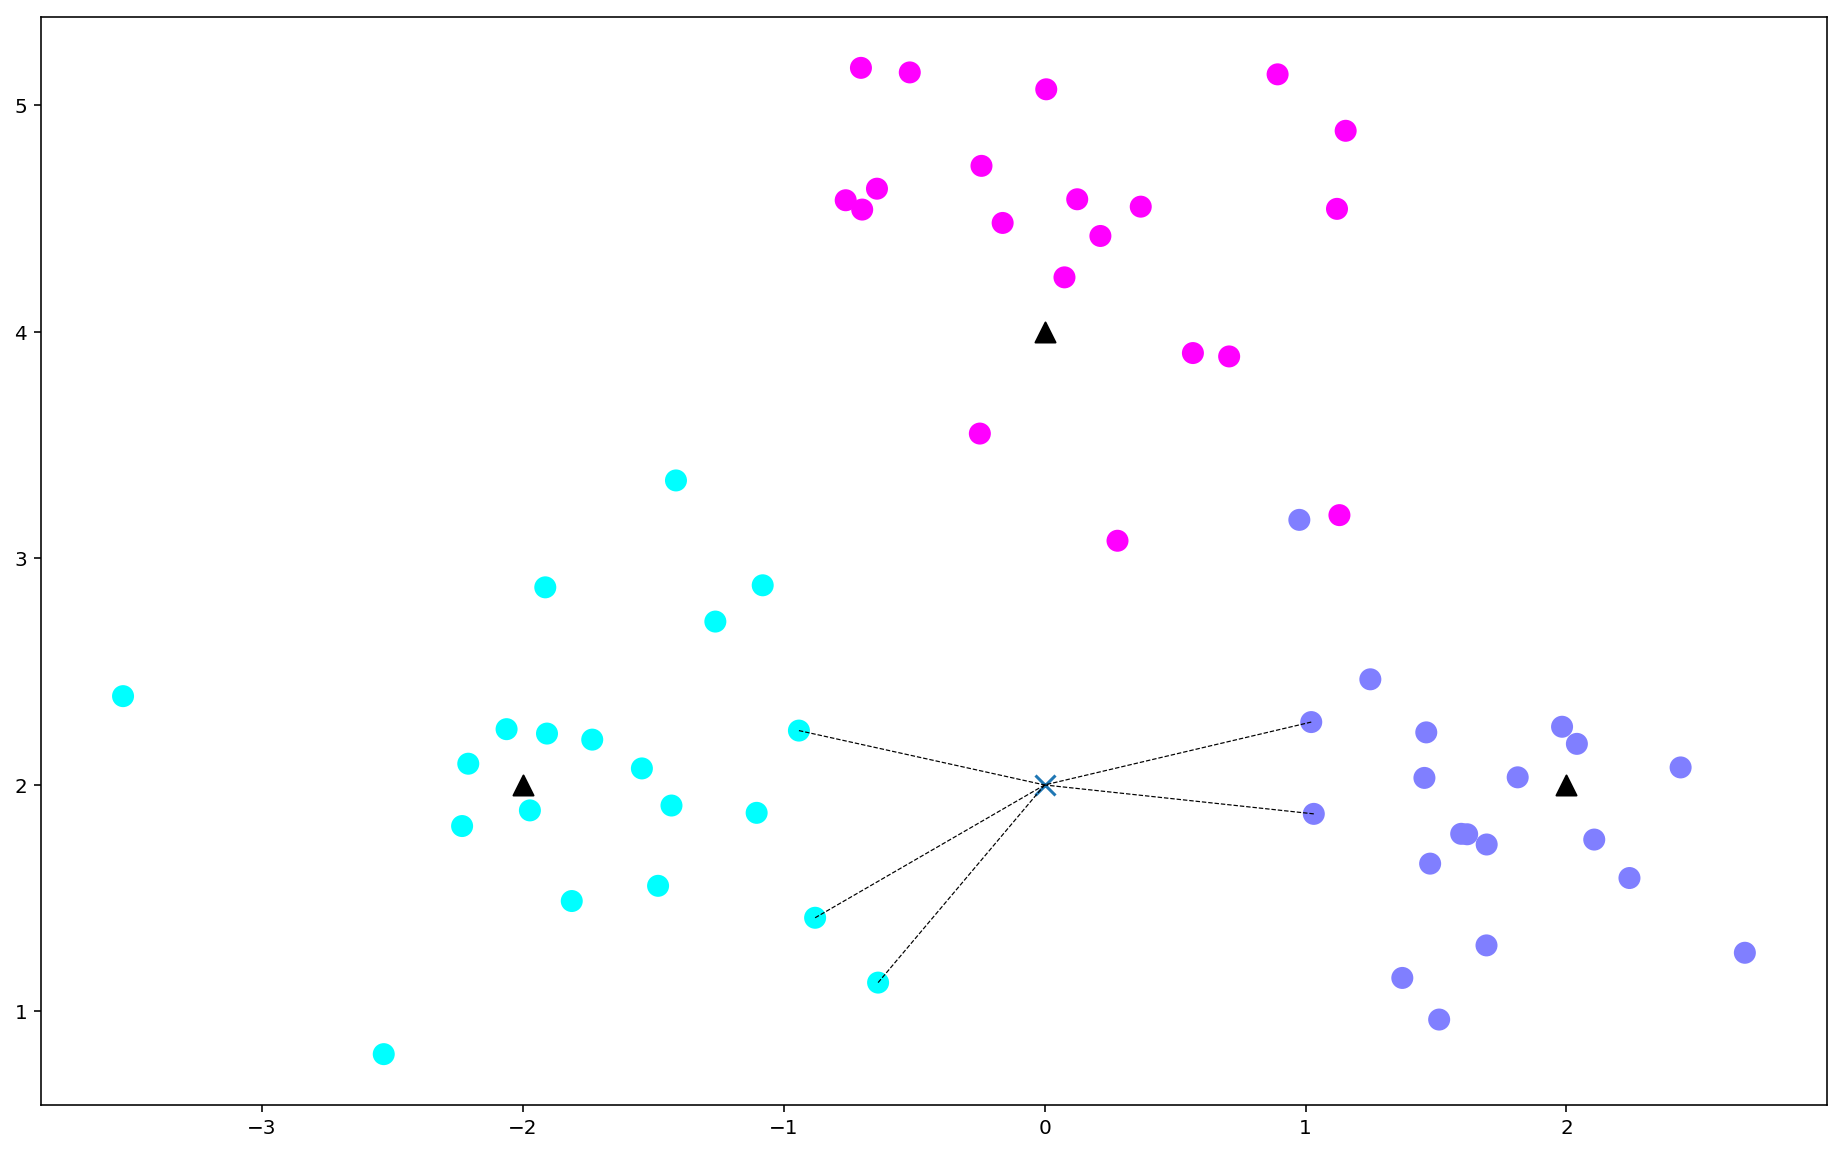

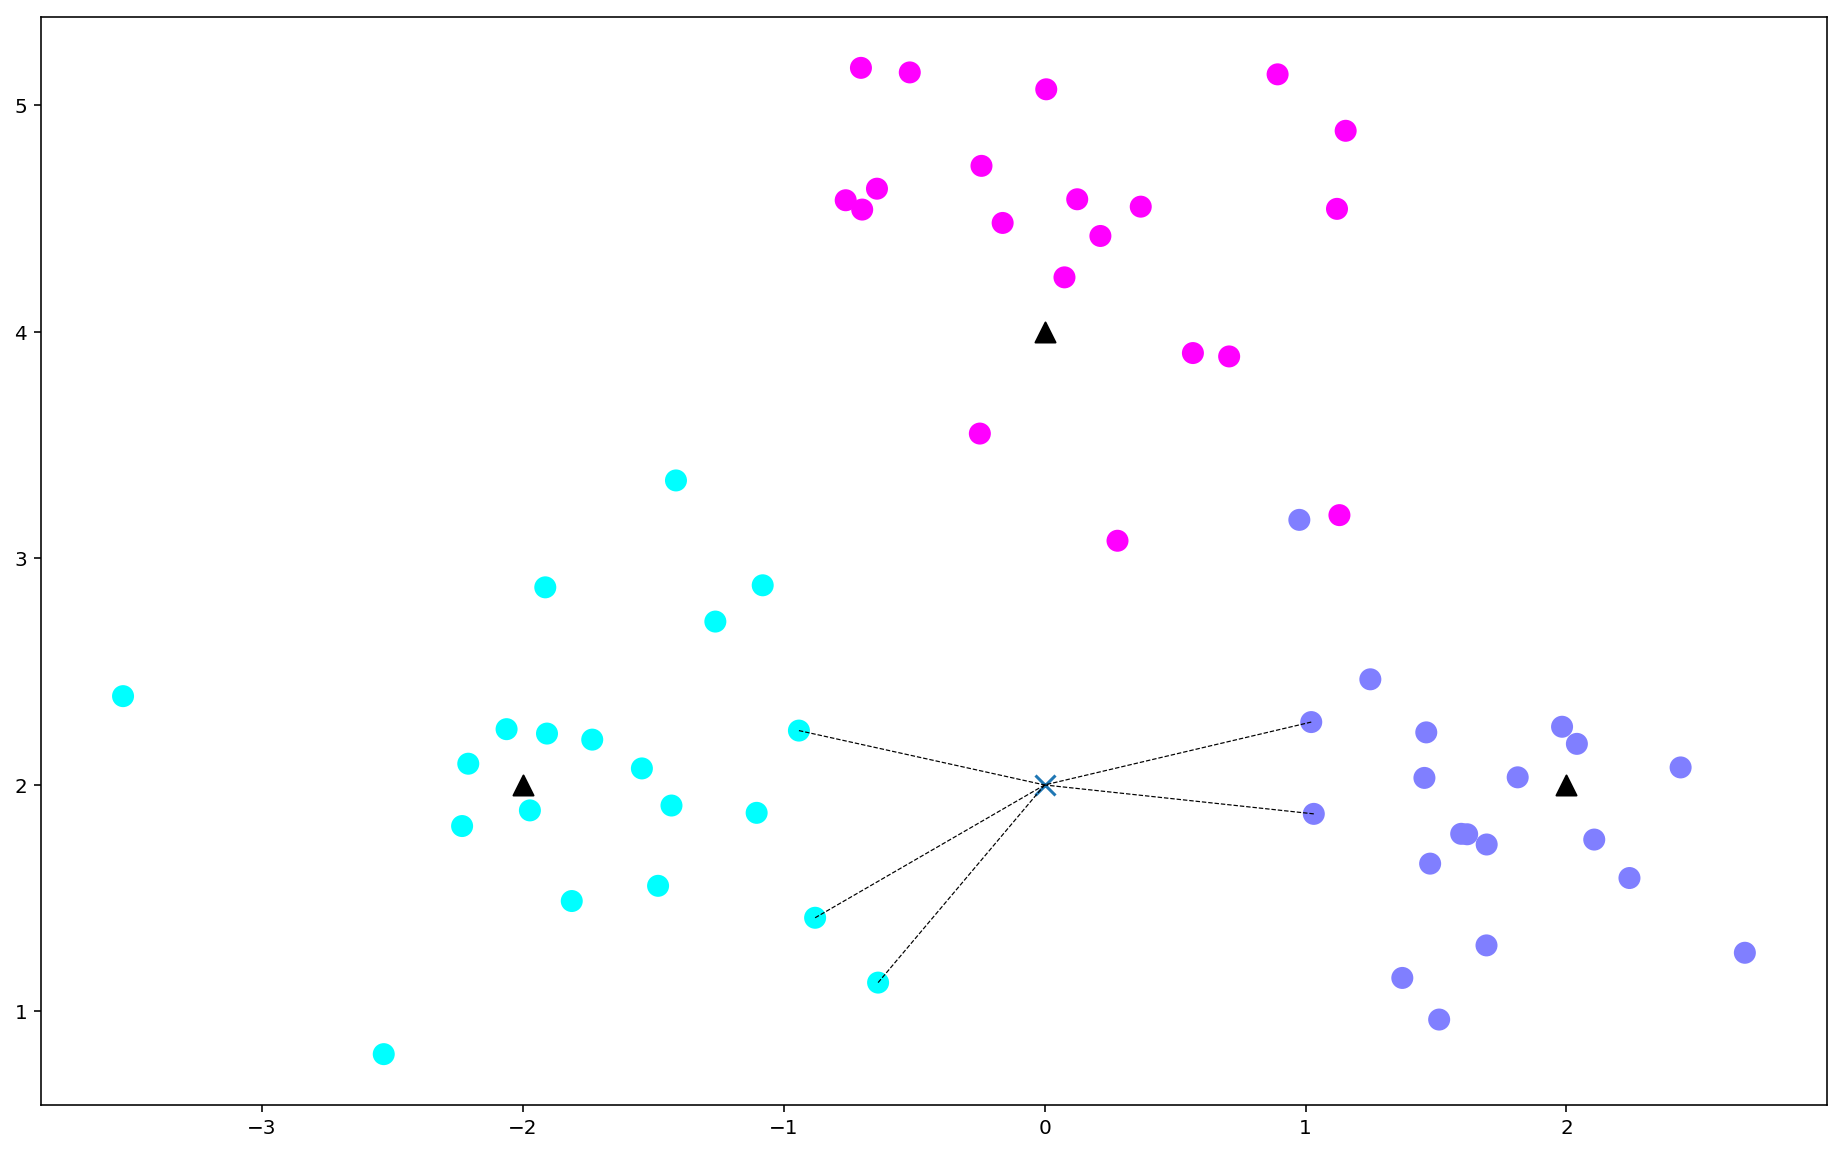

In [19]:
# 画出示意图
plt.figure(figsize=(16,10), dpi=144)
c = np.array(centers)
plt.scatter(X[:,0], X[:,1], c=y, s=100, cmap='cool') # 出样本
plt.scatter(c[:,0], c[:,1], s=100, marker='^',c='k') # 中心点
plt.scatter(X_sample[0][0], X_sample[0][1], marker="x",
           s=100, cmap='cool')      # 待预测的点
for i in neighbors[0]:
    plt.plot([X[i][0], X_sample[0][0]], [X[i][1], X_sample[0][1]],
            'k--', linewidth=0.6)  # 预测点与距离最近的5个样本的连线
plt.savefig('knn_predict.png')
plt.show()

In [16]:
y_sample

array([0])